Using device: cpu
Epoch 1/15, Train Loss: 0.6429, Test Loss: 0.4658
Epoch 2/15, Train Loss: 0.4733, Test Loss: 0.4061
Epoch 3/15, Train Loss: 0.4326, Test Loss: 0.4047
Epoch 4/15, Train Loss: 0.4141, Test Loss: 0.3803
Epoch 5/15, Train Loss: 0.4008, Test Loss: 0.3700
Epoch 6/15, Train Loss: 0.3854, Test Loss: 0.3712
Epoch 7/15, Train Loss: 0.3790, Test Loss: 0.3766
Epoch 8/15, Train Loss: 0.3694, Test Loss: 0.3642
Epoch 9/15, Train Loss: 0.3607, Test Loss: 0.3605
Epoch 10/15, Train Loss: 0.3605, Test Loss: 0.3615
Epoch 11/15, Train Loss: 0.3489, Test Loss: 0.3552
Epoch 12/15, Train Loss: 0.3495, Test Loss: 0.3469
Epoch 13/15, Train Loss: 0.3464, Test Loss: 0.3447
Epoch 14/15, Train Loss: 0.3388, Test Loss: 0.3388
Epoch 15/15, Train Loss: 0.3363, Test Loss: 0.3500
Test Accuracy: 87.67%


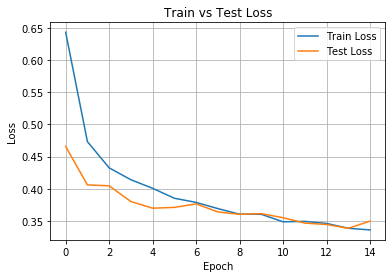

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Select device: use GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data preprocessing: convert images to tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load the FashionMNIST dataset for training and testing
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for batching and shuffling
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define a feedforward neural network with 3 hidden layers and dropout
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)       # First hidden layer (input: 784 → output: 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 256)           # Second hidden layer (128 → 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 64)            # Third hidden layer (256 → 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 10)             # Output layer (64 → 10 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)                  # Flatten input image from 1x28x28 to 784
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()                               # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Lists to store loss values for plotting
train_losses = []
test_losses = []

# Training loop for 15 epochs
for epoch in range(15):
    model.train()                                # Set model to training mode
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()                    # Clear previous gradients
        outputs = model(images)                  # Forward pass
        loss = criterion(outputs, labels)        # Compute loss
        loss.backward()                          # Backward pass
        optimizer.step()                         # Update model weights

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluate model on test set
    model.eval()
    test_loss = 0
    with torch.no_grad():                        # No need to compute gradients
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch+1}/15, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Final evaluation on the test dataset
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)     # Choose class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training and test loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Test Loss')
plt.grid(True)
plt.show()


True label: Dress
Predicted label: Dress


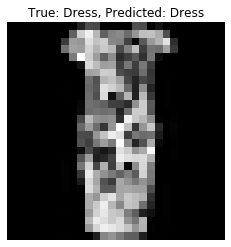

In [5]:
# Display a specific test image and its prediction
import numpy as np

# Get image and label at index 100
index = 100
image, label = test_data[index]

# Move model to eval mode and disable gradients
model.eval()
with torch.no_grad():
    input_image = image.unsqueeze(0).to(device)  # Add batch dimension and send to device
    output = model(input_image)
    predicted_class = output.argmax(dim=1).item()

# Class names for FashionMNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print actual and predicted classes
print("True label:", class_names[label])
print("Predicted label:", class_names[predicted_class])

# Plot the image
plt.imshow(np.squeeze(image), cmap='gray')
plt.title(f"True: {class_names[label]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
